In [2]:
%load_ext autoreload

In [3]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [5]:
sys.path.append(MODULES_PATH)

In [6]:
from active_learning import ExperimentSuitMetrics
from utils import MetricsTransformer, plot_in_steps

In [7]:
baseline_stats = os.path.join(METRICS_PATH, "baseline", "0_mc_dropout_random.csv")

In [10]:
data = pd.read_csv(baseline_stats, delimiter=" ")

In [12]:
training = data[["train_loss", "train_sparse_categorical_accuracy"]]

In [17]:
import ast
loss = ast.literal_eval(training.iloc[0]["train_loss"])
acc = ast.literal_eval(training.iloc[0]["train_sparse_categorical_accuracy"])

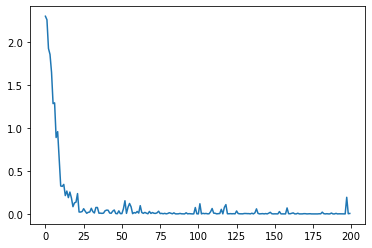

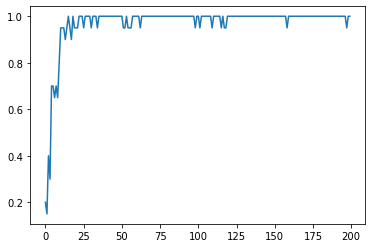

In [24]:
plt.plot(loss)

plt.figure()
plt.plot(acc)

In [10]:
path = os.path.join(METRICS_PATH, "y_gal_no_seed_no_reconstruct")
metrics_handler = ExperimentSuitMetrics(path)

In [106]:
dtypes = {
    "query_time": float,
    "eval_accuracy": float,
    "eval_loss": float,
    "labeled_pool_size": int
}

In [143]:
df_mc_1 = MetricsTransformer.load_from_dir(metrics_handler, "0_mc_dropout", dtype=dtypes)
df_mc_2 = MetricsTransformer.load_from_dir(metrics_handler, "1_mc_dropout", dtype=dtypes)
df_mc_3 = MetricsTransformer.load_from_dir(metrics_handler, "2_mc_dropout", dtype=dtypes)

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_accuracy'>

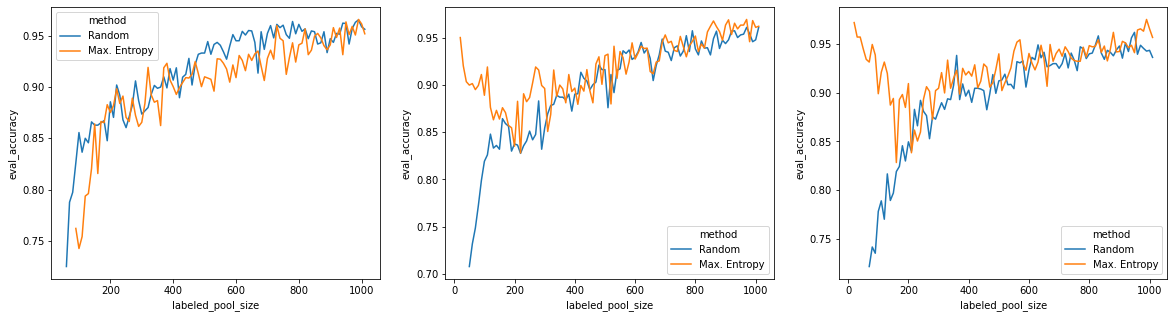

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

df_1_filter = df_mc_1["eval_accuracy"] > .7
df_2_filter = df_mc_2["eval_accuracy"] > .7
df_3_filter = df_mc_3["eval_accuracy"] > .7

sns.lineplot(ax=axes[0], data=df_mc_1[df_1_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
sns.lineplot(ax=axes[1], data=df_mc_2[df_2_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
sns.lineplot(ax=axes[2], data=df_mc_3[df_3_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")

In [145]:
mc_random_frames = MetricsTransformer.load_from_dir(metrics_handler, "mc_dropout_random", dtype=dtypes)
mc_max_entropy = MetricsTransformer.load_from_dir(metrics_handler, "mc_dropout_max_entropy", dtype=dtypes)

In [146]:
%autoreload 2
columns = ["iteration", "eval_accuracy", "labeled_pool_size", "eval_loss", "query_time"]
mc_random_mean = MetricsTransformer.mean(mc_random_frames, columns, dtype=dtypes)
mc_entropy_mean = MetricsTransformer.mean(mc_max_entropy, columns, dtype=dtypes)

In [147]:
df_random_filter = mc_random_mean["eval_accuracy"] > .8
df_entropy_filter = mc_entropy_mean["eval_accuracy"] > .8

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_accuracy'>

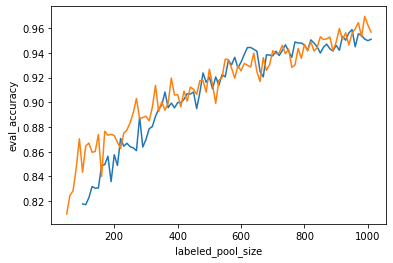

In [148]:
sns.lineplot(data=mc_random_mean[df_random_filter], y="eval_accuracy", x="labeled_pool_size")
sns.lineplot(data=mc_entropy_mean[df_entropy_filter], y="eval_accuracy", x="labeled_pool_size")

In [113]:
rand_selector = df_mc_1["method"] == "Random"
df_mc_1[np.logical_not(rand_selector)].head()

,run,model,method,train_loss,train_sparse_categorical_accuracy,train_time,query_time,eval_loss,eval_accuracy,eval_time,iteration,labeled_pool_size
0,0,MC Dropout,Max. Entropy,"[1081.969970703125, 887.2955322265625, 554.723...","[0.0, 0.05000000074505806, 0.20000000298023224...",7.092918634414673,11.036019,171.82552,0.3768,2.652090549468994,1,20
1,0,MC Dropout,Max. Entropy,"[85.83372497558594, 85.91275787353516, 57.0325...","[0.699999988079071, 0.7333333492279053, 0.7333...",5.672294855117798,5.747399,177.93324,0.4856,0.06782221794128418,2,30
2,0,MC Dropout,Max. Entropy,"[77.29566955566406, 70.91561126708984, 50.6707...","[0.75, 0.75, 0.8500000238418579, 0.89999997615...",5.616542816162109,8.403396,159.99712,0.5208,0.06990170478820801,3,40
3,0,MC Dropout,Max. Entropy,"[86.1904525756836, 68.05168914794922, 44.90356...","[0.8199999928474426, 0.8799999952316284, 0.879...",6.079386234283447,5.653657,121.97687,0.5840,0.06813573837280273,4,50
4,0,MC Dropout,Max. Entropy,"[68.45735168457031, 59.9847412109375, 48.95458...","[0.8833333253860474, 0.8500000238418579, 0.899...",5.763880968093872,5.669100,108.63424,0.6380,0.07097554206848145,5,60


In [114]:
random_losses = MetricsTransformer.list_to_series(df_mc_1[rand_selector], "train_loss")

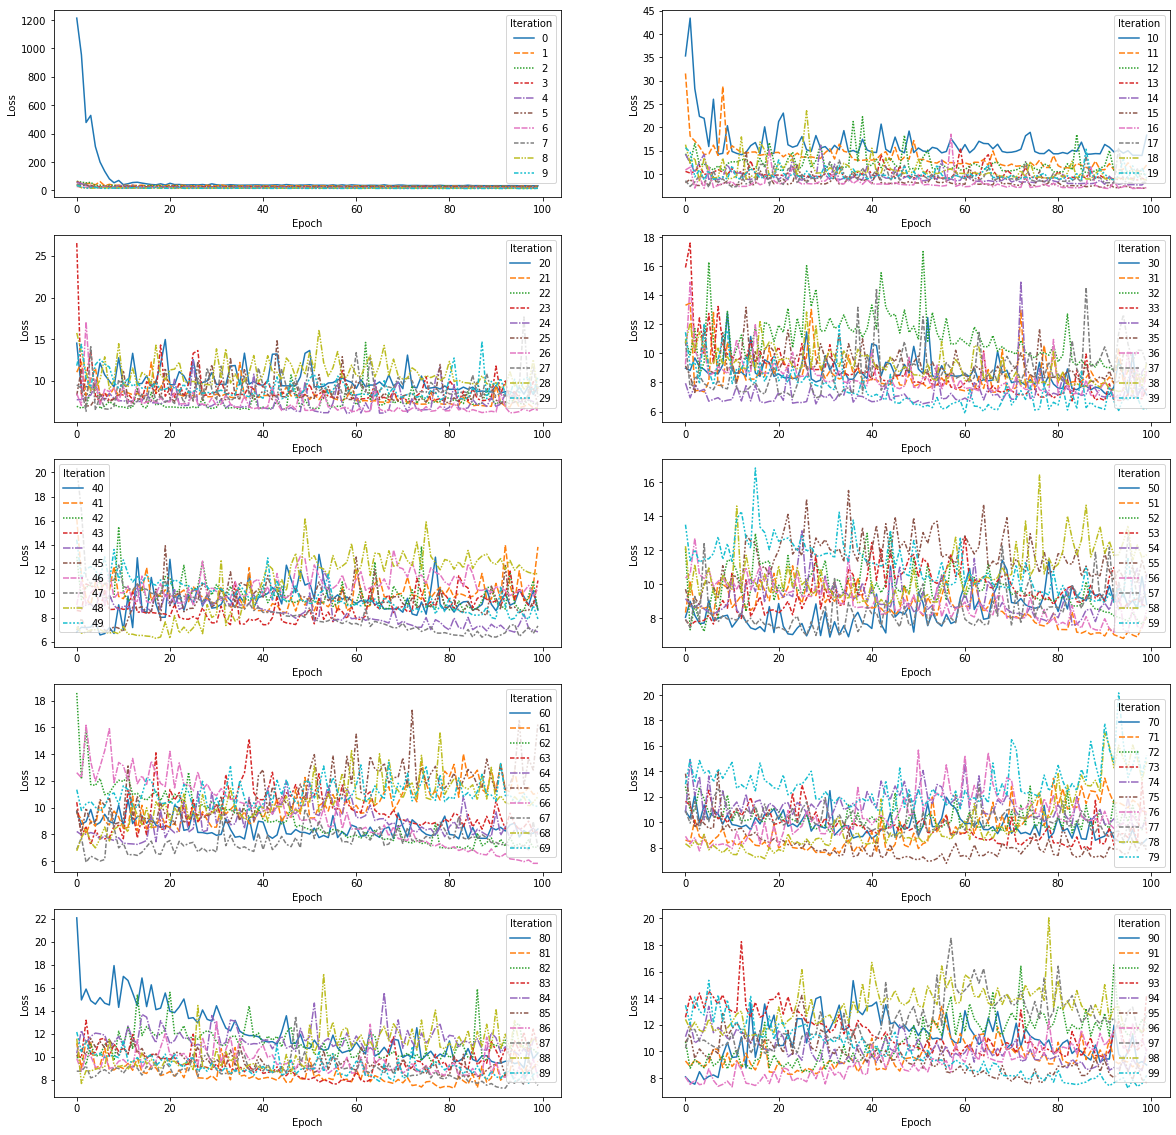

In [115]:
plot_in_steps(random_losses, 10, 10, num_columns=2, figsize=(20, 20))

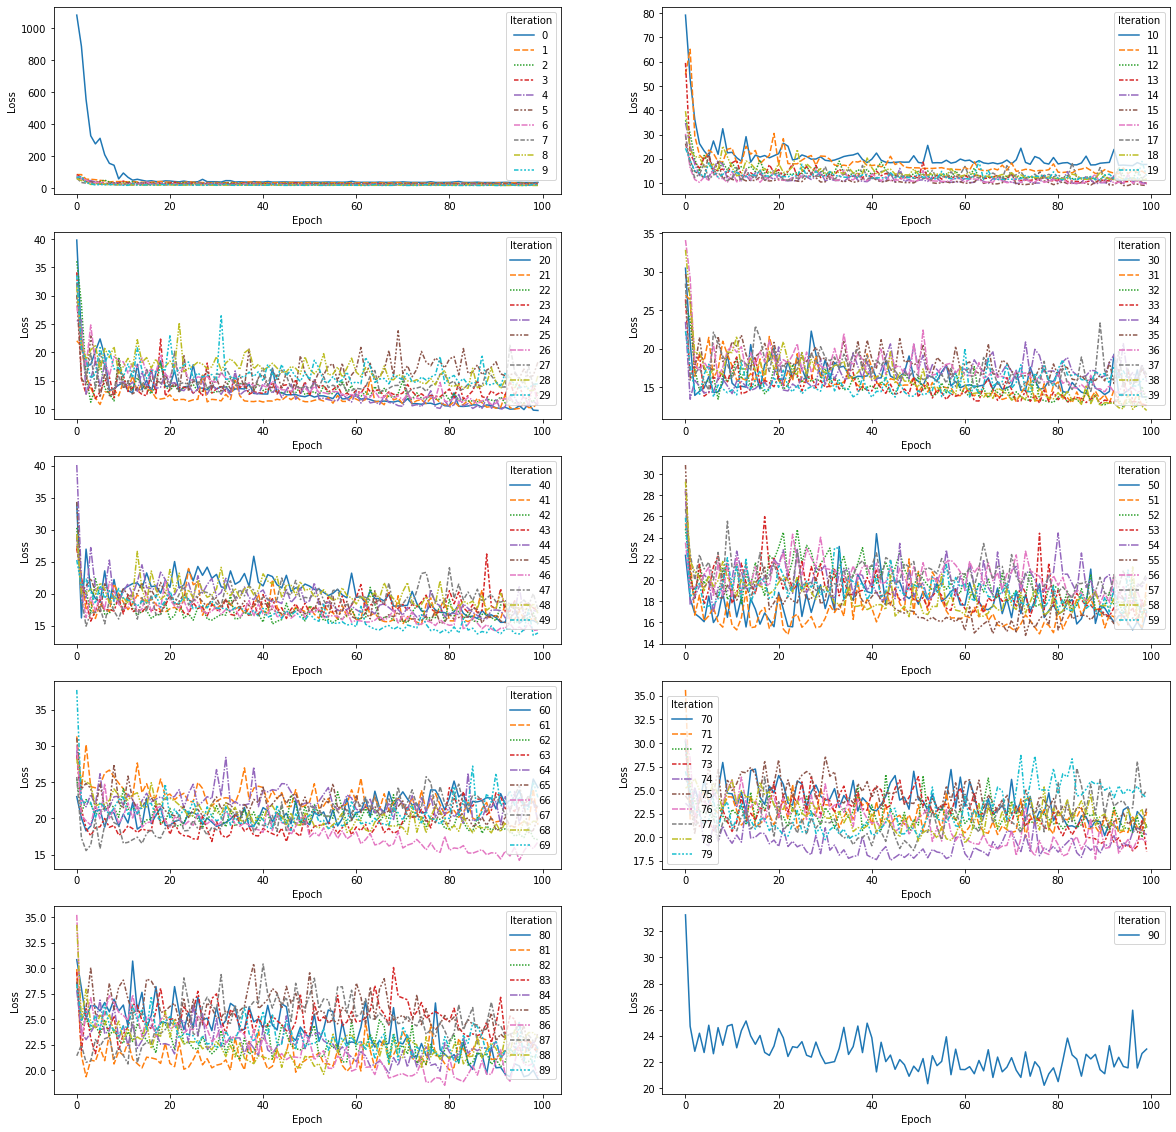

In [116]:
mx_entropy_losses = MetricsTransformer.list_to_series(df_mc_1[np.logical_not(rand_selector)], "train_loss")
plot_in_steps(mx_entropy_losses, 10, 10, num_columns=2, figsize=(20, 20))

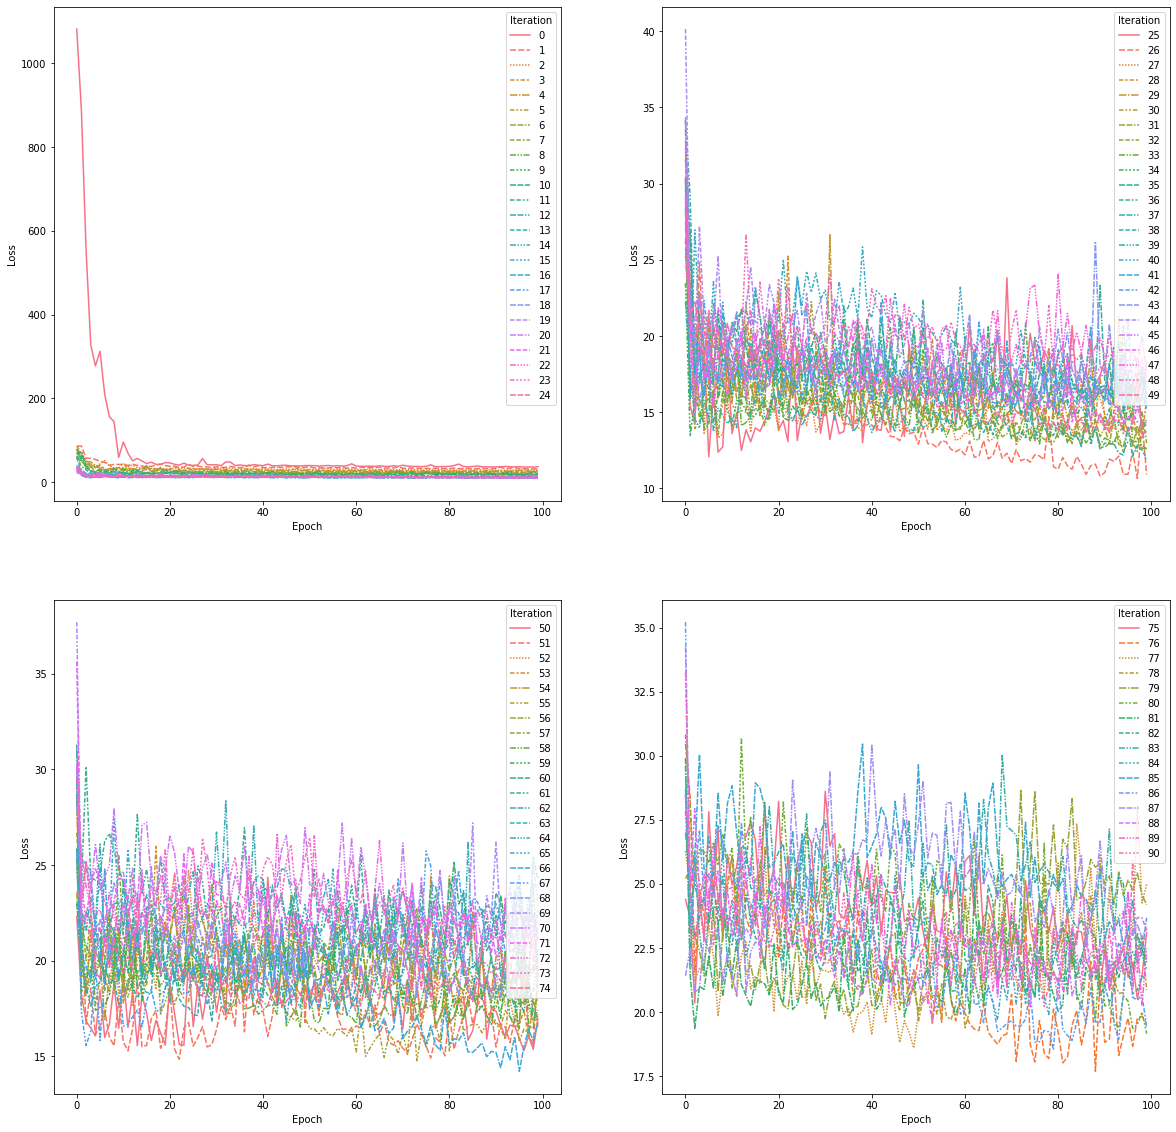

In [117]:
plot_in_steps(mx_entropy_losses, 25, 4, num_columns=2, figsize=(20, 20))